## Задание

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

%matplotlib inline

### Загрузка цветного изображения

In [2]:
img = imageio.imread('picture.jpg')
img = img.astype(np.float32) / 255.
print(img)

[[[0.5764706  0.5764706  0.60784316]
  [0.5882353  0.5882353  0.61960787]
  [0.6        0.6        0.6313726 ]
  ...
  [0.34509805 0.47058824 0.5529412 ]
  [0.34509805 0.47058824 0.5529412 ]
  [0.34901962 0.4745098  0.5568628 ]]

 [[0.5764706  0.5764706  0.60784316]
  [0.5803922  0.5921569  0.61960787]
  [0.5921569  0.6039216  0.6313726 ]
  ...
  [0.3254902  0.4509804  0.53333336]
  [0.3254902  0.4509804  0.53333336]
  [0.3254902  0.4509804  0.53333336]]

 [[0.5686275  0.5803922  0.60784316]
  [0.5764706  0.5882353  0.6156863 ]
  [0.5882353  0.6        0.627451  ]
  ...
  [0.29803923 0.42352942 0.5058824 ]
  [0.29803923 0.42352942 0.5058824 ]
  [0.29803923 0.42352942 0.5058824 ]]

 ...

 [[0.3254902  0.36862746 0.3764706 ]
  [0.32941177 0.37254903 0.38039216]
  [0.34901962 0.39215687 0.4       ]
  ...
  [0.3529412  0.39215687 0.5294118 ]
  [0.4627451  0.5176471  0.67058825]
  [0.5294118  0.6039216  0.76862746]]

 [[0.3254902  0.36862746 0.3764706 ]
  [0.34117648 0.38431373 0.39215687]


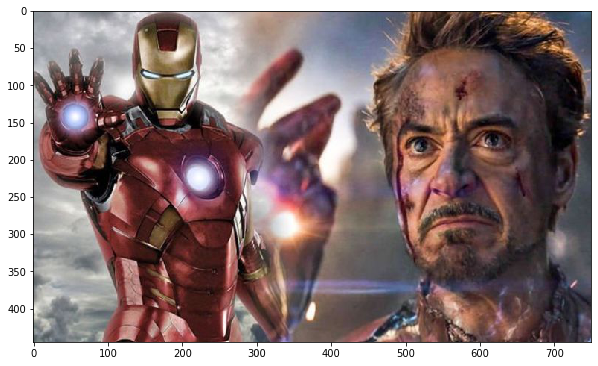

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(img)

### Получение ЧБ изображения по цветному

In [4]:
img_bw = np.mean(img, axis=2)

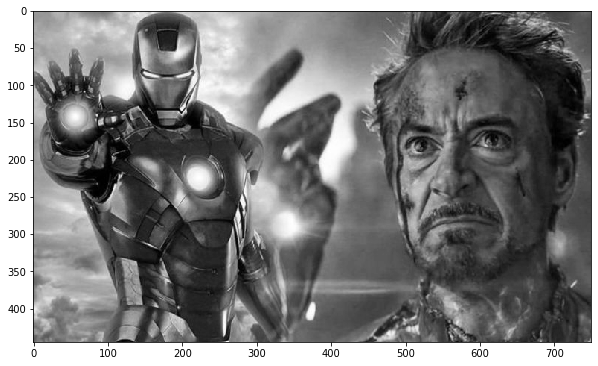

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(img_bw, cmap='gray')

### Цветное пространство HSV

In [6]:
from skimage.color import rgb2hsv, hsv2rgb

In [7]:
img_hsv = rgb2hsv(img)
print(img_hsv)

[[[0.6666667  0.0516129  0.60784316]
  [0.6666667  0.05063291 0.61960787]
  [0.6666667  0.04968943 0.6313726 ]
  ...
  [0.5660377  0.37588653 0.5529412 ]
  [0.5660377  0.37588653 0.5529412 ]
  [0.5660377  0.37323946 0.5568628 ]]

 [[0.6666667  0.0516129  0.60784316]
  [0.6166667  0.06329113 0.61960787]
  [0.6166667  0.06211179 0.6313726 ]
  ...
  [0.5660377  0.3897059  0.53333336]
  [0.5660377  0.3897059  0.53333336]
  [0.5660377  0.3897059  0.53333336]]

 [[0.6166667  0.06451612 0.60784316]
  [0.6166667  0.06369426 0.6156863 ]
  [0.6166667  0.06249999 0.627451  ]
  ...
  [0.5660377  0.41085273 0.5058824 ]
  [0.5660377  0.41085273 0.5058824 ]
  [0.5660377  0.41085273 0.5058824 ]]

 ...

 [[0.525641   0.13541666 0.3764706 ]
  [0.525641   0.13402061 0.38039216]
  [0.525641   0.12745097 0.4       ]
  ...
  [0.6296297  0.33333334 0.5294118 ]
  [0.6226415  0.30994153 0.67058825]
  [0.61475414 0.31122446 0.76862746]]

 [[0.525641   0.13541666 0.3764706 ]
  [0.525641   0.13       0.39215687]


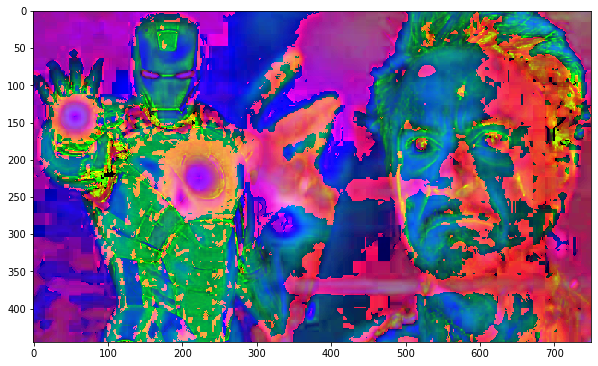

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(img_hsv)

### Линейное увеличение насыщенности

In [9]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

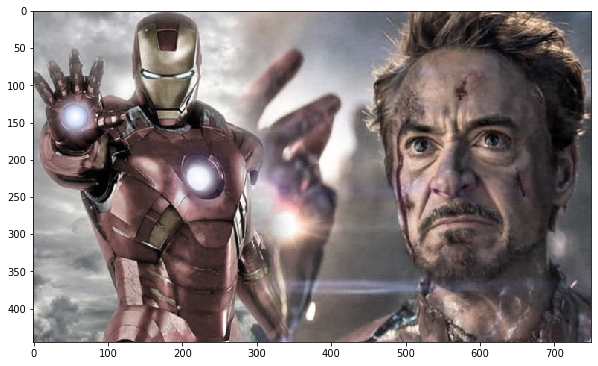

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(img_new)

### Функция фильтра (box blur)

In [11]:
def box_blur_filter(x):
    return np.mean(x)

In [12]:
win_size = (11, 11)

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1),
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]): 
        x = img[i:i + win_size[0], j:j + win_size[1]]
        out_img[i, j] = box_blur_filter(x)

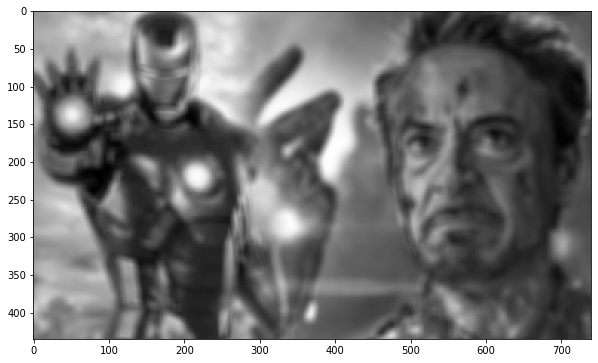

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(out_img, cmap='gray')